In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
x = np.array(data['age'])
y = np.array(data['charges'])

x = x.reshape(1338, 1)
y = y.ravel()

model = SGDRegressor(max_iter=1000, random_state=2022)
model.fit(x, y)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,2022


In [10]:
print('intercept:', model.intercept_, 'coef:', model.coef_)

intercept: [5681.91465975] coef: [523.17410181]


In [11]:
# 회귀 모델 결과의 결정계수는 다음과 같으며 4%로 낮게 나온 것을 알 수 있음
model.score(x, y)

-1.1451732244219177

In [12]:
x_new = [[19], [64]]
y_hat = model.predict(x_new)
y_hat

array([15622.2225941 , 39165.05717546])

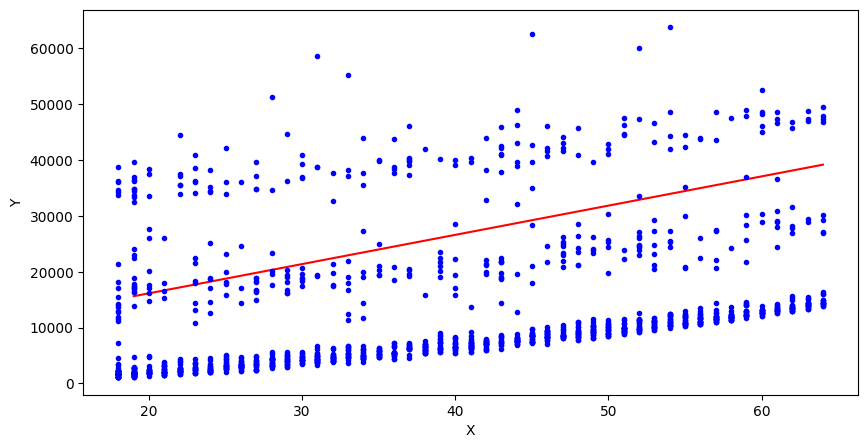

In [13]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [14]:
# 연습문제

import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# 1. 데이터 불러오기
df = pd.read_csv("boston.csv")

# 2. 독립변수(X)와 종속변수(y) 선택
X = df[["RM"]]      # 2차원 유지
y = df["PRICE"]

# 3. 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. SGDRegressor 모델 생성
sgd = SGDRegressor(
    max_iter=1000,
    tol=1e-3,
    random_state=42
)

# 5. 모델 학습
sgd.fit(X_scaled, y)

print("회귀 계수 (RM):", sgd.coef_)
print("절편 (Intercept):", sgd.intercept_)


회귀 계수 (RM): [6.39765869]
절편 (Intercept): [22.54569628]
